In [1]:
#https://github.com/victoreram/Springboard-Data-Science/blob/master/GenreClustering/GenreClustering.ipynb
#https://medium.com/latinxinai/discovering-descriptive-music-genres-using-k-means-clustering-d19bdea5e443
%matplotlib inline
################################################################################
    #################Use Pycharm/Spyder for more complex work################
################################################################################
import ast
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
#from sklearn import cluster

In [2]:
data = pd.read_csv('data_test_two.csv', index_col=0)
data = data.drop(['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20'],axis=1) #Filename is not required
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate']
data
################################################################################
    #################Must split genre 900/100 training data/test data#################
################################################################################

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,label
Filename,,,,,,,,,,
blues.00000.wav,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,blues
blues.00001.wav,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,blues
blues.00002.wav,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,blues
blues.00003.wav,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,blues
blues.00004.wav,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,blues
blues.00005.wav,0.265523,0.078779,30.561682,1513.328291,0.000586,1545.490618,0.015439,2875.332613,0.073996,blues
blues.00006.wav,0.254311,0.109664,30.890941,1145.755065,0.000196,1214.084741,-0.028623,2288.361163,0.056807,blues
blues.00007.wav,0.269021,0.099818,29.627338,1154.687121,0.000298,1396.025197,-0.025248,2349.544126,0.047211,blues
blues.00008.wav,0.372944,0.109156,28.785792,1332.261464,0.000292,1809.549485,0.019990,2866.499333,0.047101,blues


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175E100CDD8>,
      dtype=object)

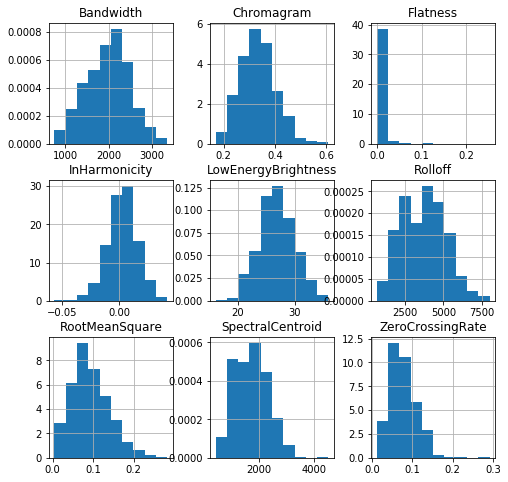

In [3]:
X_prenorm = data[features]
pd.DataFrame(X_prenorm,columns=features).hist(figsize=(8,8), normed=True)

In [4]:
genre_count = data.groupby('label').agg({'label':'count'})['label']
# major_genres = genre_count[genre_count > 300].index.values
# minor_genres = genre_count[genre_count <= 300].index.values
print(genre_count)
# print("Major genres: {} \nMinor Genres: {}".format(major_genres, minor_genres))

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64


In [5]:
norm = Normalizer()
data[features] = norm.fit_transform(data[features])

In [6]:
genre_groupby = data.groupby('label').agg('mean')
clusters = genre_groupby.reset_index().rename({'label':'cluster'}, axis=1)
clusters['method'] = 'Mean'

oldclusters = clusters
oldclusters

,cluster,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,method
0,blues,0.000095,0.000031,0.009385,0.383351,1.476339e-07,0.501761,1.801463e-06,0.765021,0.000017,Mean
1,classical,0.000094,0.000014,0.011817,0.429980,9.323878e-08,0.474724,1.711586e-06,0.763360,0.000027,Mean
2,country,0.000088,0.000028,0.007599,0.384429,6.458886e-07,0.491168,4.492794e-07,0.777591,0.000017,Mean
3,disco,0.000063,0.000016,0.004302,0.381829,1.862941e-06,0.414741,7.300378e-07,0.824350,0.000017,Mean
4,hiphop,0.000080,0.000024,0.005157,0.367816,1.079384e-06,0.434271,7.598728e-08,0.819070,0.000013,Mean
5,jazz,0.000083,0.000023,0.009227,0.394017,2.462926e-07,0.482573,6.627399e-07,0.777874,0.000018,Mean
6,metal,0.000075,0.000019,0.004852,0.404867,6.719337e-07,0.383961,4.698671e-07,0.829020,0.000020,Mean
7,pop,0.000061,0.000024,0.004801,0.368592,1.337589e-06,0.430400,4.503217e-07,0.821246,0.000014,Mean
8,reggae,0.000092,0.000022,0.005971,0.373002,1.284842e-06,0.486213,8.053435e-08,0.784653,0.000014,Mean
9,rock,0.000078,0.000022,0.006613,0.386620,5.251090e-07,0.443581,8.869458e-07,0.804856,0.000017,Mean


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175E46B69B0>,
      dtype=object)

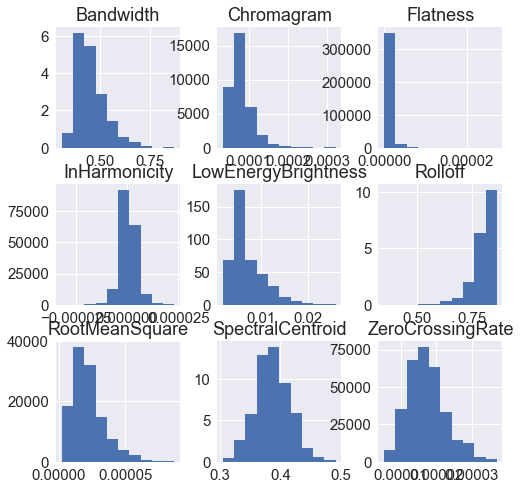

In [74]:
data[features].hist(figsize=(8,8), normed=True)

Text(0.5,1,'Elbow Method')

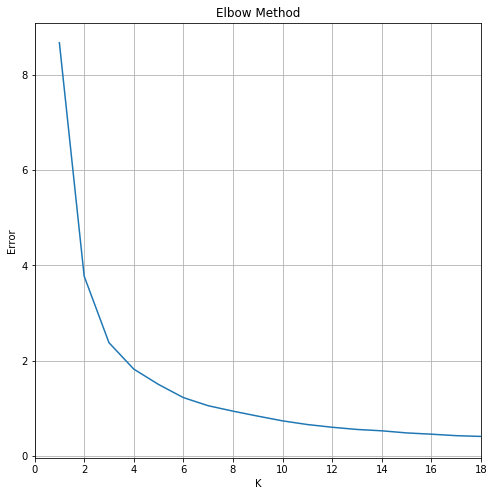

In [8]:
X = data[['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate']]

Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Text(0.5,0,'K')

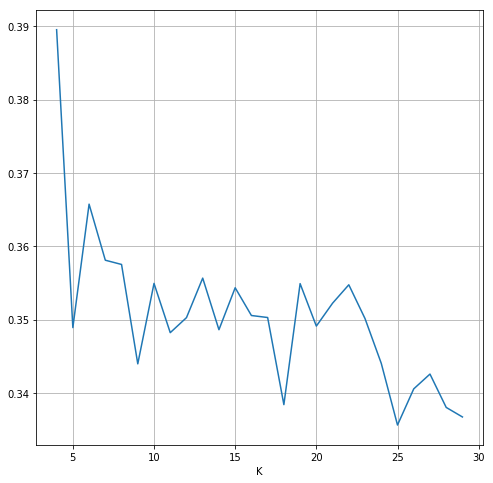

In [9]:
Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, random_state=1986).fit(X) for i in Ks]
s_scores = [silhouette_score(X,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')

In [10]:
X = data[['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate']]
km = KMeans(n_clusters=len(genre_groupby), n_init=10, random_state=1986)
km.fit(X)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
km_clusters = pd.DataFrame(cluster_centers, columns=features)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'
oldclusters = pd.concat([oldclusters, km_clusters])
cols = ['cluster'] + features + ['method']
oldclusters = oldclusters[cols]

################################################################################
    #########################Try 1000 clusters#############################
################################################################################

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()


In [11]:
newclusters = oldclusters

In [12]:
newclusters

,cluster,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,method
0,blues,0.000095,0.000031,0.009385,0.383351,1.476339e-07,0.501761,1.801463e-06,0.765021,0.000017,Mean
1,classical,0.000094,0.000014,0.011817,0.429980,9.323878e-08,0.474724,1.711586e-06,0.763360,0.000027,Mean
2,country,0.000088,0.000028,0.007599,0.384429,6.458886e-07,0.491168,4.492794e-07,0.777591,0.000017,Mean
3,disco,0.000063,0.000016,0.004302,0.381829,1.862941e-06,0.414741,7.300378e-07,0.824350,0.000017,Mean
4,hiphop,0.000080,0.000024,0.005157,0.367816,1.079384e-06,0.434271,7.598728e-08,0.819070,0.000013,Mean
5,jazz,0.000083,0.000023,0.009227,0.394017,2.462926e-07,0.482573,6.627399e-07,0.777874,0.000018,Mean
6,metal,0.000075,0.000019,0.004852,0.404867,6.719337e-07,0.383961,4.698671e-07,0.829020,0.000020,Mean
7,pop,0.000061,0.000024,0.004801,0.368592,1.337589e-06,0.430400,4.503217e-07,0.821246,0.000014,Mean
8,reggae,0.000092,0.000022,0.005971,0.373002,1.284842e-06,0.486213,8.053435e-08,0.784653,0.000014,Mean
9,rock,0.000078,0.000022,0.006613,0.386620,5.251090e-07,0.443581,8.869458e-07,0.804856,0.000017,Mean


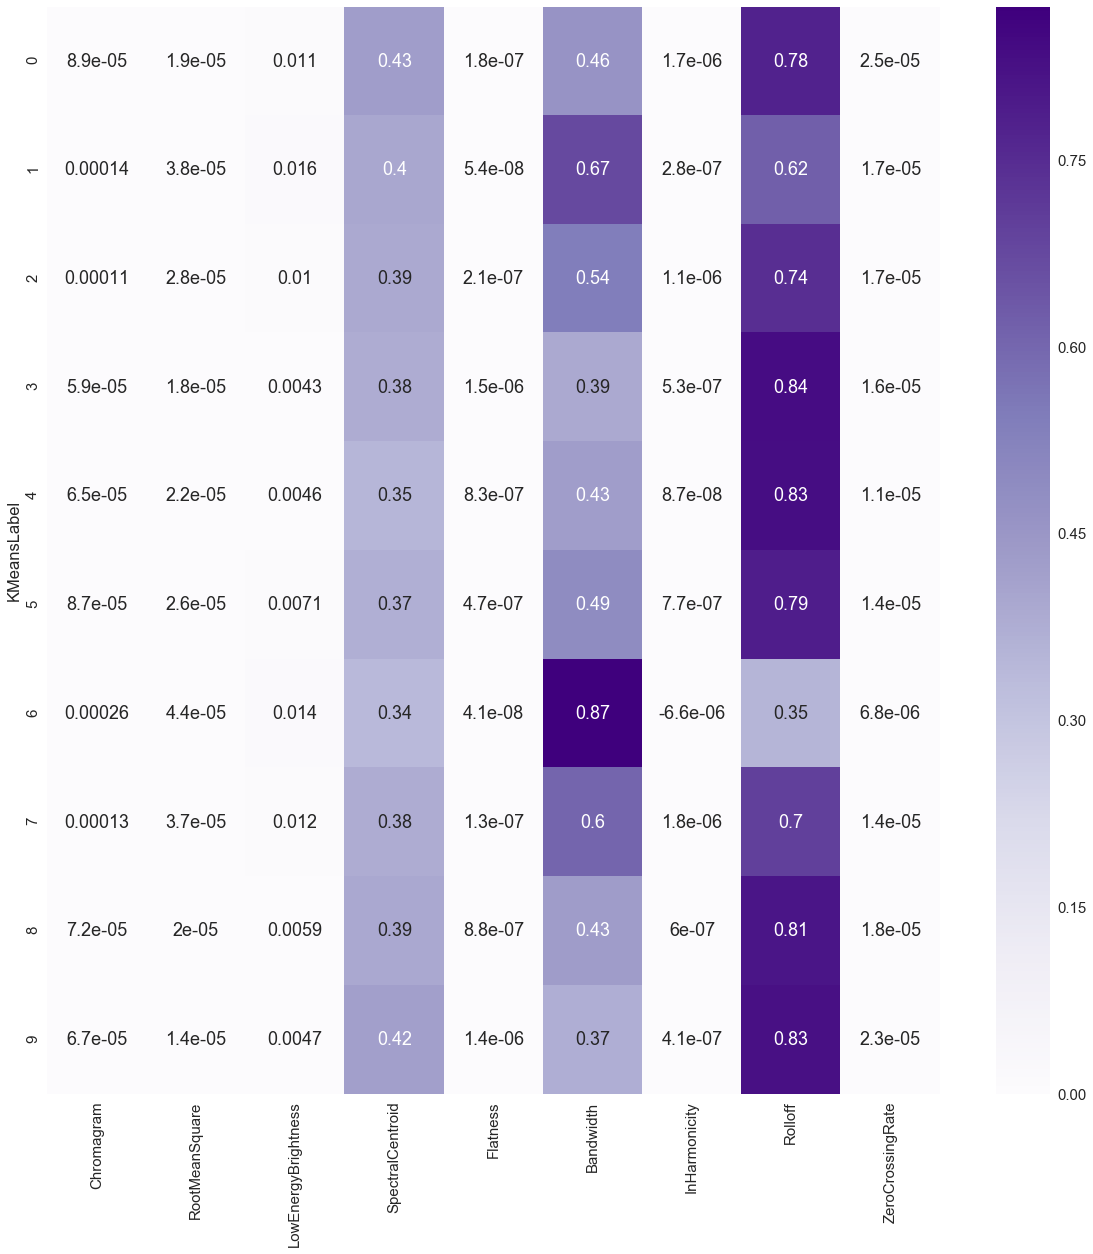

In [13]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(
    data=newclusters.loc[newclusters.method=='KMeans', features],
    cmap='Purples',
    annot=True
)
plt.ylabel("KMeansLabel")
plt.savefig('heatmap_all.png')

In [14]:
#distances = [abs(np.linalg.norm(genre_coordinates-c)) for c in genre_coordinates_other]
### Assign K-Means Label to Descriptive Labels
descriptive_labels = ["Slow & Somber Acoustics", "Sad Instrumentals", "Upbeat Songs With Cheerful Vocals", 
                      "Fast & Danceable Instrumentals", "Fast, Upbeat & Cheerful Songs", "Happy & Upbeat Instrumentals",
                      "Aggressive, Fast Paced Acoustics", "Slow Happy Dance", "Happy & Slow", "Fast, Upbeat & Cheerful Acoustics"]

descriptive_labels = ["Slow & Somber Acoustics","Sad Instrumentals", "Upbeat Songs With Cheerful Vocals", 
                      "Fast & Danceable Instrumentals", "Fast, Upbeat & Cheerful Songs", "Happy & Upbeat Instrumentals",
                      "Aggressive, Fast Paced Acoustics", "Slow Happy Dance", "Happy & Slow", "Fast, Upbeat & Cheerful Acoustics"]
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
data['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))
################################################################################
#####################TRy other clustering algorithms############################
################################################################################

genre_count = data.groupby('label').agg({'label':'count'})['label']

# How many instances of each k-means cluster are there?
print("### Instances of KMeans Cluster ###")
print(data[['label', 'KMeansLabel']].groupby('KMeansLabel').agg('count'))

# Which cluster corresponds to the most instances per genre?
print("### Which cluster corresponds to the most instances per genre? ###")
print(data[['label', 'KMeansLabel']].groupby('label').agg(lambda x:x.value_counts().index[0]))

# Which genre corresponds to the most instances per cluster?
print("### Which genre corresponds to the most instances per cluster? ###")
print(data[['label', 'KMeansLabel']].groupby('KMeansLabel').agg(lambda x:x.value_counts().index[0]))

### Instances of KMeans Cluster ###
                                   label
KMeansLabel                             
Aggressive, Fast Paced Acoustics       1
Fast & Danceable Instrumentals       186
Fast, Upbeat & Cheerful Acoustics    114
Fast, Upbeat & Cheerful Songs        110
Happy & Slow                         159
Happy & Upbeat Instrumentals         156
Sad Instrumentals                     25
Slow & Somber Acoustics               99
Slow Happy Dance                      45
Upbeat Songs With Cheerful Vocals    105
### Which cluster corresponds to the most instances per genre? ###
                                 KMeansLabel
label                                       
blues                           Happy & Slow
classical            Slow & Somber Acoustics
country         Happy & Upbeat Instrumentals
disco         Fast & Danceable Instrumentals
hiphop        Fast & Danceable Instrumentals
jazz       Upbeat Songs With Cheerful Vocals
metal      Fast, Upbeat & Cheerful Acoustics


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
x,y = zip(*X_new)
data['x'] = x
data['y'] = y
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [16]:
audio_components = dict(list(zip(features, zip(*np.round(components,2)))))
audio_components

{'Chromagram': (0.0, 0.0),
 'RootMeanSquare': (0.0, -0.0),
 'LowEnergyBrightness': (0.03, 0.04),
 'SpectralCentroid': (-0.0, 0.91),
 'Flatness': (-0.0, 0.0),
 'Bandwidth': (0.83, -0.23),
 'InHarmonicity': (0.0, 0.0),
 'Rolloff': (-0.56, -0.35),
 'ZeroCrossingRate': (-0.0, 0.0)}

In [17]:
components

array([[ 2.56670599e-04,  6.51365103e-05,  3.12452407e-02,
        -4.83704263e-03, -5.37364343e-06,  8.30381586e-01,
         2.27789066e-06, -5.56297303e-01, -7.83489384e-06],
       [ 1.14863384e-04, -6.89261220e-05,  4.20030552e-02,
         9.05798042e-01,  9.25631651e-07, -2.32107655e-01,
         6.73563322e-06, -3.51982449e-01,  1.56983268e-04]])

In [18]:
singular_values

array([2.76211379, 0.99462562])

Text(0.5,1,'Clustering by Genre, Reduced Dimension')

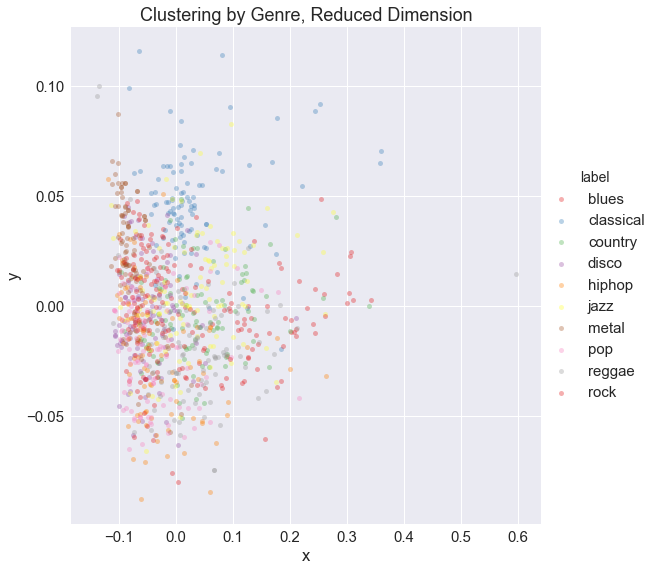

In [19]:
sns.set(font_scale=1.5)
sns.lmplot(data=data, x='x', y='y', hue='label', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
# plt.legend(loc='lower right')
# plt.ylim(-0.7,1.8)
# plt.xlim(-0.7,1.8)
plt.savefig('pca_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")
# arrow = plt.arrow(x=0.2, y=-0.40, dx=0.4, dy=0, width=0.04, label='More acoustic, less energy')
# arrow.label = 'More acoustic, less energy'

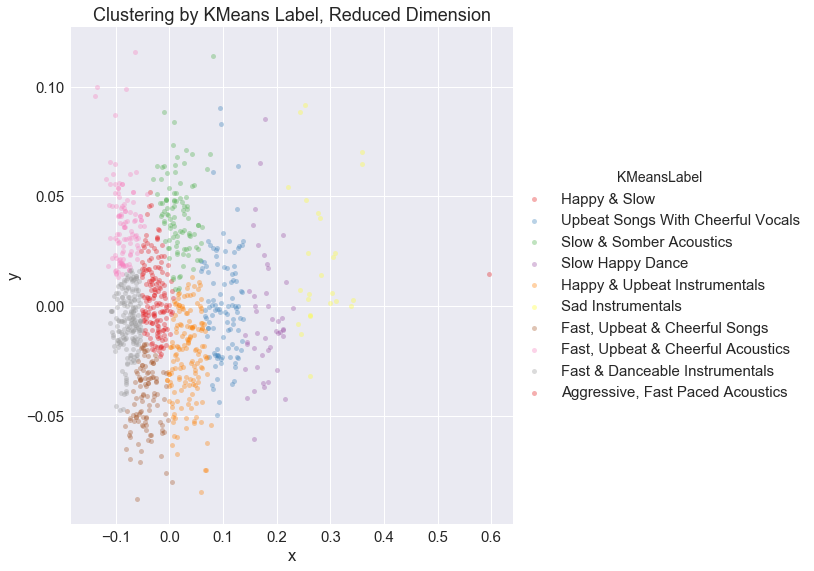

In [20]:
sns.set(font_scale=1.5)

sns.lmplot(data=data, x='x', y='y', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension")

plt.savefig('pca_scatter_KM.png')

In [109]:
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
#https://stackoverflow.com/questions/49413837/dimensions-of-confusion-matrix-after-applying-kmeans-algorithm-not-as-expected
#https://stackoverflow.com/questions/47708865/confusion-matrix-for-clustering-in-scikit-learn
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

from sklearn.utils.multiclass import unique_labels
olddata = oldclusters[features]
newdata = newclusters[features]
print(olddata)
print(newdata)

# olddatanorm = norm.fit_transform(olddata)
# newdatanorm = norm.fit_transform(newdata)
# print(olddatanorm)
# print(newdatanorm)

cutoff = 0.7
old_data_pred_classes = np.zeros_like(olddata)
old_data_pred_classes[olddatanorm > cutoff] = 1
new_data_pred_classes = np.zeros_like(newdata)
new_data_pred_classes[newdatanorm > cutoff] = 1

print(old_data_pred_classes)
print(new_data_pred_classes)

matrix = confusion_matrix(old_data_pred_classes.argmax(axis=1), new_data_pred_classes.argmax(axis=1))
matrix

   Chromagram  RootMeanSquare  LowEnergyBrightness  SpectralCentroid  \
0    0.000095        0.000031             0.009385          0.383351   
1    0.000094        0.000014             0.011817          0.429980   
2    0.000088        0.000028             0.007599          0.384429   
3    0.000063        0.000016             0.004302          0.381829   
4    0.000080        0.000024             0.005157          0.367816   
5    0.000083        0.000023             0.009227          0.394017   
6    0.000075        0.000019             0.004852          0.404867   
7    0.000061        0.000024             0.004801          0.368592   
8    0.000092        0.000022             0.005971          0.373002   
9    0.000078        0.000022             0.006613          0.386620   
0    0.000089        0.000019             0.010699          0.427233   
1    0.000145        0.000038             0.016092          0.398907   
2    0.000108        0.000028             0.010318          0.39

array([[ 2,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, 17]], dtype=int64)

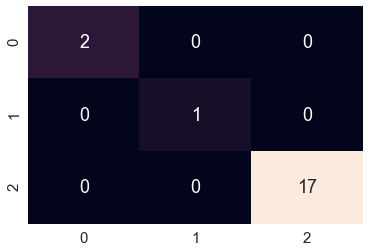

In [99]:
sns.heatmap(matrix,annot=True,cbar=False)

Text(0.5,1,'Confusion Matrix')

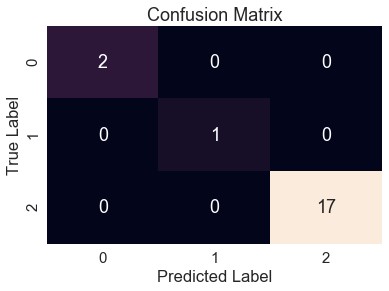

In [100]:
sns.heatmap(matrix,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')